In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc, recall_score, precision_score,f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer

In [3]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# 결측치 처리
data.iloc[:,23].fillna(data.iloc[:,23].mean(), inplace = True)
data.iloc[:,10].fillna(data.iloc[:,10].mean(), inplace = True)

In [5]:
# 컬럼 삭제
data.drop(['stays_in_weekend_nights','arrival_date_day_of_month','children','arrival_date_week_number', 'company','reservation_status_date', 'country', 'reservation_status'], axis = 1, inplace = True)

In [6]:
# x,y 분리
X = (data.loc[:, data.columns != 'is_canceled'])
y = (data.loc[:, data.columns == 'is_canceled'])

In [7]:
x_columns = X.columns #컬럼명 지정
x_columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'stays_in_week_nights', 'adults', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [8]:
object_column_name = X.select_dtypes('object').columns
print(object_column_name)

object_column_index = X.columns.get_indexer(X.select_dtypes('object').columns)
print(object_column_index)

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')
[ 0  3  7  8  9 13 14 16 19]


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X['hotel'] = encoder.fit_transform(X['hotel'])
X['hotel']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: hotel, Length: 119390, dtype: int32

In [10]:
X['arrival_date_month'] = encoder.fit_transform(X['arrival_date_month'])
X['arrival_date_month']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         5
1         5
2         5
3         5
4         5
         ..
119385    1
119386    1
119387    1
119388    1
119389    1
Name: arrival_date_month, Length: 119390, dtype: int32

In [11]:
X['meal'] = encoder.fit_transform(X['meal'])
X['meal']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    2
Name: meal, Length: 119390, dtype: int32

In [12]:
X['market_segment'] = encoder.fit_transform(X['market_segment'])
X['market_segment']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         3
1         3
2         3
3         2
4         6
         ..
119385    5
119386    6
119387    6
119388    6
119389    6
Name: market_segment, Length: 119390, dtype: int32

In [13]:
X['distribution_channel'] = encoder.fit_transform(X['distribution_channel'])
X['distribution_channel']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         1
1         1
2         1
3         0
4         3
         ..
119385    3
119386    3
119387    3
119388    3
119389    3
Name: distribution_channel, Length: 119390, dtype: int32

In [14]:
X['reserved_room_type'] = encoder.fit_transform(X['reserved_room_type'])
X['reserved_room_type']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2
1         2
2         0
3         0
4         0
         ..
119385    0
119386    4
119387    3
119388    0
119389    0
Name: reserved_room_type, Length: 119390, dtype: int32

In [15]:
X['assigned_room_type'] = encoder.fit_transform(X['assigned_room_type'])
X['assigned_room_type']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2
1         2
2         2
3         0
4         0
         ..
119385    0
119386    4
119387    3
119388    0
119389    0
Name: assigned_room_type, Length: 119390, dtype: int32

In [16]:
X['deposit_type'] = encoder.fit_transform(X['deposit_type'])
X['deposit_type']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: deposit_type, Length: 119390, dtype: int32

In [17]:
X['customer_type'] = encoder.fit_transform(X['customer_type'])
X['customer_type']

c:\users\swl\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         2
1         2
2         2
3         2
4         2
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: customer_type, Length: 119390, dtype: int32

In [18]:
# 데이터셋 나누기 - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# 데이터셋 나누기 - train/validation 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 1)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_year               119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   babies                          119390 non-null  int64  
 7   meal                            119390 non-null  int64  
 8   market_segment                  119390 non-null  int64  
 9   distribution_channel            119390 non-null  int64  
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

In [40]:
X_train

,hotel,lead_time,arrival_date_year,arrival_date_month,stays_in_week_nights,adults,babies,meal,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
10194,1,58,2017,3,6,2,0,0,6,3,...,6,6,0,0,240.000000,0,2,88.00,0,0
36843,1,345,2017,8,5,2,1,0,5,3,...,0,2,1,0,6.000000,0,2,53.57,1,2
100591,0,37,2016,10,2,2,0,3,6,3,...,0,0,0,0,7.000000,0,2,83.93,0,1
60475,0,33,2016,9,2,2,0,3,6,3,...,0,0,0,0,9.000000,0,2,84.15,0,1
63104,0,26,2017,4,4,2,0,0,6,3,...,3,3,0,0,9.000000,0,2,91.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99484,0,15,2016,10,1,1,0,0,2,0,...,0,0,0,0,86.693382,0,2,65.00,0,0
61090,0,24,2016,2,10,2,0,3,6,3,...,0,0,0,0,9.000000,0,2,74.80,0,0
55118,0,237,2016,1,2,0,0,0,6,3,...,1,1,0,0,9.000000,0,3,86.50,0,1
66250,0,123,2017,0,4,2,0,0,5,3,...,0,0,1,0,3.000000,0,2,88.20,0,1


In [41]:
def model(algo):
    algo_model = algo.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob_train = algo.predict_proba(X_train)[:,1]
    y_prob_val = algo.predict_proba(X_val)[:,1]
    
    y_pred_train = algo_model.predict(X_train)
    y_pred_val = algo_model.predict(X_val)
    
    print('Accuracy_score:{},{}\n\nConfusion Matrix:\n {}\n{}'.
         format(accuracy_score(y_train, y_pred_train), accuracy_score(y_val, y_pred_val), confusion_matrix(y_train, y_pred_train), 
               confusion_matrix(y_val, y_pred_val), roc_auc_score(y_train, y_pred_train),
               roc_auc_score(y_val, y_pred_val)))

In [42]:
print('Model: XGBoost\n')
model(XGBClassifier())

Model: XGBoost



c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy_score:0.8244645390677082,0.8180839183152521

Confusion Matrix:
 [[34551  2235]
 [ 8034 13681]]
[[14718  1008]
 [ 3553  5793]]


In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

xg = XGBClassifier()
param_grid = {
    'n_estimators':[150,200,250],
    'max_depth':range(1,15),
    'learning_rate':[0.3,0.5,0.7],
    'random_state':[1]
}
n_iter = 50

randomized_search = RandomizedSearchCV(xg,
                                       param_distributions = param_grid,
                                       n_iter = n_iter,
                                       scoring = 'accuracy',
                                       cv = 5,
                                       n_jobs = -1)

In [45]:
randomized_search.fit(X_train, y_train)

c:\users\jiyoon\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.3, 0.5, 0.7],
                                        'max_depth': range(1, 15),
                                        'n_estimators': [150, 200, 250],
                                        'random_state': [1]},
                   scoring='accuracy')

In [47]:
pd.DataFrame(randomized_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,104.144273,5.421431,1.034231,0.147176,1,250,10,0.3,"{'random_state': 1, 'n_estimators': 250, 'max_...",0.860354,0.859231,0.855470,0.854701,0.861709,0.858293,0.002745,1
16,76.417684,3.760502,0.747973,0.060841,1,200,10,0.3,"{'random_state': 1, 'n_estimators': 200, 'max_...",0.859756,0.858034,0.856068,0.855726,0.860085,0.857934,0.001806,2
9,121.629038,18.494763,0.978470,0.211029,1,200,11,0.3,"{'random_state': 1, 'n_estimators': 200, 'max_...",0.861550,0.861453,0.853932,0.852051,0.860684,0.857934,0.004090,3
20,130.565509,14.620743,1.453867,0.358674,1,250,11,0.3,"{'random_state': 1, 'n_estimators': 250, 'max_...",0.860525,0.858547,0.854103,0.852564,0.861538,0.857455,0.003534,4
6,114.595355,12.526228,1.358865,0.199215,1,200,13,0.3,"{'random_state': 1, 'n_estimators': 200, 'max_...",0.858303,0.856838,0.853333,0.852308,0.862906,0.856737,0.003787,5
8,43.589224,4.501649,0.317936,0.035484,1,150,8,0.3,"{'random_state': 1, 'n_estimators': 150, 'max_...",0.856252,0.858889,0.850769,0.852137,0.860684,0.855746,0.003803,6
33,64.144134,11.796257,0.513921,0.133677,1,150,9,0.5,"{'random_state': 1, 'n_estimators': 150, 'max_...",0.857704,0.857350,0.849658,0.850940,0.858974,0.854926,0.003837,7
1,70.730133,3.968485,0.691410,0.031019,1,250,8,0.5,"{'random_state': 1, 'n_estimators': 250, 'max_...",0.859072,0.855128,0.850855,0.848547,0.859316,0.854584,0.004317,8
45,34.037596,0.742757,0.282066,0.034381,1,150,7,0.5,"{'random_state': 1, 'n_estimators': 150, 'max_...",0.856679,0.854957,0.850769,0.850855,0.856667,0.853985,0.002666,9
22,52.749643,5.355510,0.367805,0.057205,1,200,7,0.5,"{'random_state': 1, 'n_estimators': 200, 'max_...",0.857363,0.854615,0.852051,0.848803,0.856838,0.853934,0.003179,10


In [49]:
randomized_search.best_params_

{'random_state': 1, 'n_estimators': 250, 'max_depth': 10, 'learning_rate': 0.3}

In [51]:
randomized_search.best_estimator_

XGBClassifier(learning_rate=0.3, max_depth=10, n_estimators=250, random_state=1)

In [52]:
# best_param 뽑아서 TRAIN, VALIDATION
pred_train_xg = randomized_search.predict(X_train)
pred_val_xg = randomized_search.predict(X_val)

In [53]:
accuracy_score(y_train, pred_train_xg), accuracy_score(y_val, pred_val_xg)

(0.9727013213449343, 0.8606413529036375)

In [56]:
pred_test_xg = randomized_search.predict(X_test)

In [57]:
accuracy_score(y_train, pred_train_xg), accuracy_score(y_val, pred_val_xg), accuracy_score(y_test, pred_test_xg)

(0.9727013213449343, 0.8606413529036375, 0.8611273976044895)

In [19]:
# 파라미터 수정(서우님 걸로 수정)
xg = XGBClassifier(random_state= 1, 
                   n_estimators= 250, 
                   max_features= 11, 
                   max_depth= 19)

xg.fit(X_train,y_train)

c:\users\swl\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\swl\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[17:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:03:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=19,
              max_features=11, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [20]:
# best_param 뽑아서 TRAIN, VALIDATION
pred_train_1 = xg.predict(X_train)
pred_val_1 = xg.predict(X_val)

In [21]:
accuracy_score(y_train, pred_train_1), accuracy_score(y_val, pred_val_1)

(0.9917437308763952, 0.8582083599234206)

In [22]:
pred_test_1 = xg.predict(X_test)
accuracy_score(y_test, pred_test_1)

0.8604852444369991

In [23]:
xg.fit(X_train, y_train)

c:\users\swl\anaconda3\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\swl\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[17:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:04:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=19,
              max_features=11, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [24]:
# 예측
pred_train_xgb = xg.predict(X_train)
pred_val_xgb = xg.predict(X_val)
pred_test_xgb = xg.predict(X_test)

In [25]:
X_train.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'stays_in_week_nights', 'adults', 'babies', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [26]:
xg.feature_importances_

array([0.0023158 , 0.00180137, 0.00236211, 0.00158614, 0.00155353,
       0.00182956, 0.00190449, 0.00167664, 0.00823556, 0.0018448 ,
       0.00222945, 0.07415783, 0.00710923, 0.00280153, 0.00237306,
       0.00440815, 0.69283736, 0.00309111, 0.0045012 , 0.00591942,
       0.00157131, 0.16677588, 0.00711451], dtype=float32)

In [27]:
np.sort(xg.feature_importances_)

array([0.00155353, 0.00157131, 0.00158614, 0.00167664, 0.00180137,
       0.00182956, 0.0018448 , 0.00190449, 0.00222945, 0.0023158 ,
       0.00236211, 0.00237306, 0.00280153, 0.00309111, 0.00440815,
       0.0045012 , 0.00591942, 0.00710923, 0.00711451, 0.00823556,
       0.07415783, 0.16677588, 0.69283736], dtype=float32)

In [29]:
fi = xg.feature_importances_
fi

array([0.0023158 , 0.00180137, 0.00236211, 0.00158614, 0.00155353,
       0.00182956, 0.00190449, 0.00167664, 0.00823556, 0.0018448 ,
       0.00222945, 0.07415783, 0.00710923, 0.00280153, 0.00237306,
       0.00440815, 0.69283736, 0.00309111, 0.0045012 , 0.00591942,
       0.00157131, 0.16677588, 0.00711451], dtype=float32)

In [30]:
fi_s = pd.Series(fi, index=X_train.columns)
fi_s.sort_values(ascending=False)

deposit_type                      0.692837
required_car_parking_spaces       0.166776
previous_cancellations            0.074158
market_segment                    0.008236
total_of_special_requests         0.007115
previous_bookings_not_canceled    0.007109
customer_type                     0.005919
days_in_waiting_list              0.004501
booking_changes                   0.004408
agent                             0.003091
reserved_room_type                0.002802
assigned_room_type                0.002373
arrival_date_year                 0.002362
hotel                             0.002316
is_repeated_guest                 0.002229
babies                            0.001904
distribution_channel              0.001845
adults                            0.001830
lead_time                         0.001801
meal                              0.001677
arrival_date_month                0.001586
adr                               0.001571
stays_in_week_nights              0.001554
dtype: floa

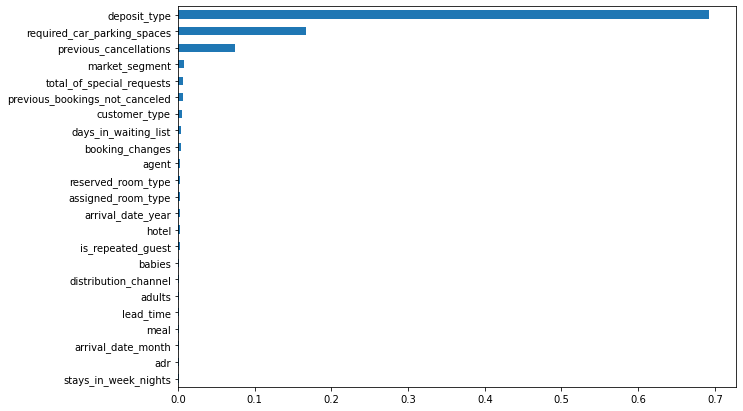

In [31]:
import matplotlib.pyplot as plt
fi_s.sort_values().plot(kind='barh', figsize=(10,7))
plt.show()

In [ ]:
# 0.7908806 - 'deposit_type'
# 0.09039088 - 'required_car_parking_spaces'
# 0.05572329 - 'previous_cancellations'

In [71]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(XGBClassifier(n_estimators = 250,
                          max_depth = 19,
                          max_features = 11,
                          random_state = 1))

In [72]:
model.fit(X_train, y_train)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(max_depth=19, max_features=11, n_estimators=250,
                               random_state=1))])

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1709cfcea88>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1709e0e5588>})

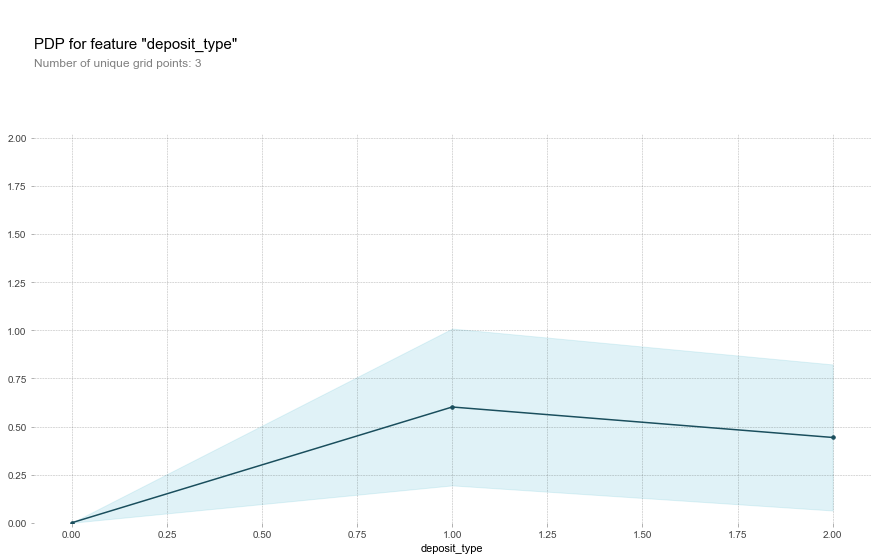

In [73]:
# pdp - deposit_type
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'deposit_type'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model = model,
                           dataset = X_val,
                           model_features = features,
                           feature = feature)
pdp.pdp_plot(pdp_dist, feature)

In [28]:
# pdp - 'required_car_parking_spaces'
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'required_car_parking_spaces'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model = model,
                           dataset = X_val,
                           model_features = features,
                           feature = feature)
pdp.pdp_plot(pdp_dist, feature)

ModuleNotFoundError: No module named 'pdpbox'

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1709f580d88>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1709f687bc8>})

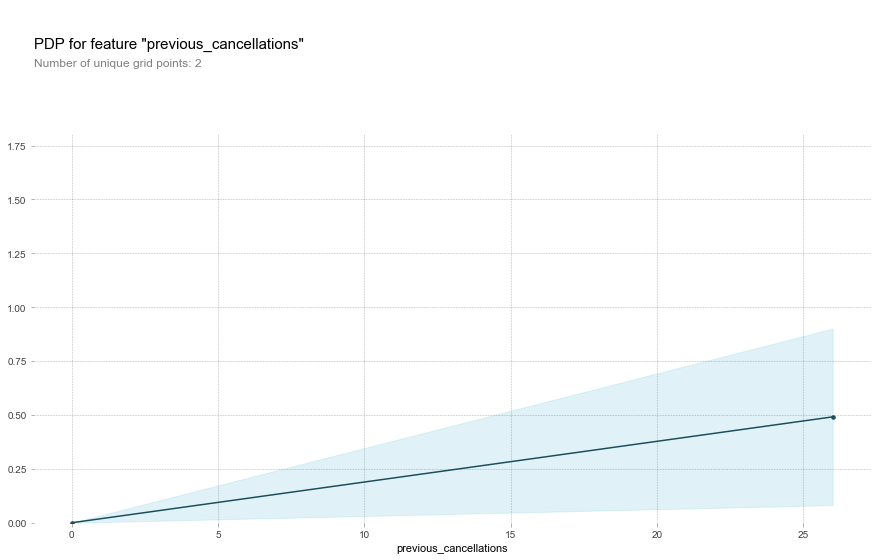

In [76]:
# pdp - 'previous_cancellations'
import matplotlib.pyplot as plt
from pdpbox import pdp

feature = 'previous_cancellations'
features = X_val.columns
pdp_dist = pdp.pdp_isolate(model = model,
                           dataset = X_val,
                           model_features = features,
                           feature = feature)
pdp.pdp_plot(pdp_dist, feature)